<a href="https://colab.research.google.com/github/rp-bot/DSP-Fundamentals/blob/master/Chapter2_(WaveShaping)/Convolution_Reverb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown 1SX4O2LDen4334ED5haHvlOqH3OpNEXFz

Downloading...
From: https://drive.google.com/uc?id=1SX4O2LDen4334ED5haHvlOqH3OpNEXFz
To: /content/gun_shot_sfx.wav
100% 799k/799k [00:00<00:00, 115MB/s]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import convolve

In [10]:
# Load the gunshot sound effect wave file
sample_rate, gunshot_wave = wavfile.read('gun_shot_sfx.wav')

# Ensure the gunshot_wave is a 1D array (mono)
if gunshot_wave.ndim > 1:
    gunshot_wave = gunshot_wave.mean(axis=1)

In [11]:
# Generate a sine wave
duration = 1.0  # seconds
frequency = 440.0  # Hz (A4 note)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sine_wave = 0.5 * np.sin(2 * np.pi * frequency * t)

In [12]:
# Perform convolution
convolved_wave = convolve(sine_wave, gunshot_wave, mode='same')

In [13]:
# Normalize the convolved wave to prevent clipping
convolved_wave = convolved_wave / np.max(np.abs(convolved_wave))

# Save the convolved result to a new WAV file
wavfile.write('convolved_output.wav', sample_rate, convolved_wave.astype(np.float32))

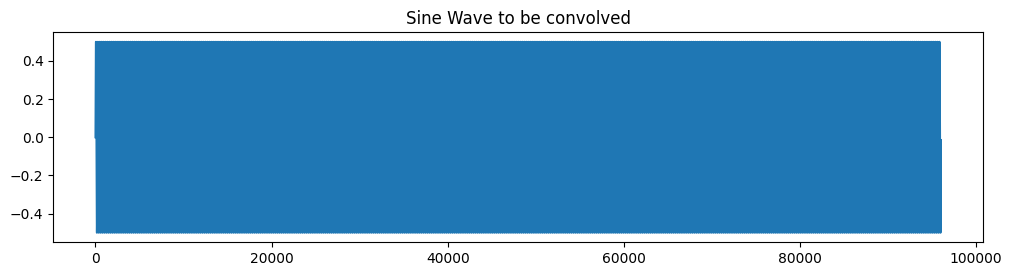

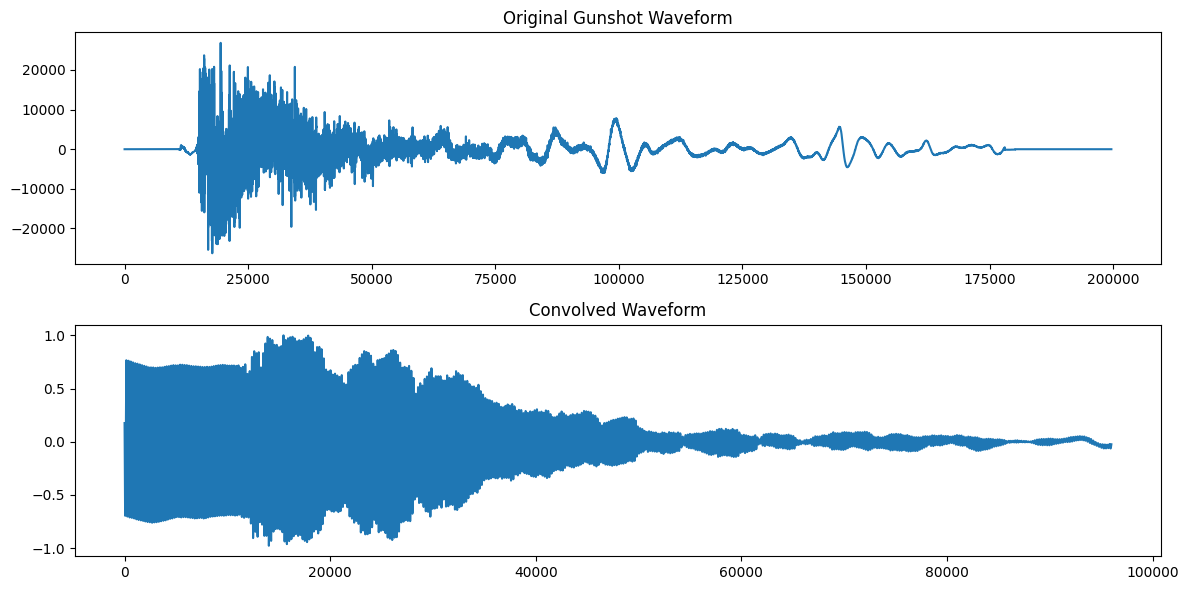

In [16]:
# Plot original and convolved signals\
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Sine Wave to be convolved")
plt.plot(sine_wave)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Original Gunshot Waveform")
plt.plot(gunshot_wave)
plt.subplot(2, 1, 2)
plt.title("Convolved Waveform")
plt.plot(convolved_wave)
plt.tight_layout()
plt.show()

# Play the convolved audio (requires IPython.display)
from IPython.display import Audio
Audio('convolved_output.wav')